In [522]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Storing the three datasets into Dataframe Objects using Pandas

In [577]:
surgery_df = pd.read_csv("Hackathon.PXdata.20210311.xlsx - covid_srgry_px_2019.csv", index_col = 0)
state_df = pd.read_csv("Hackathon.DXdata.StateRestrictions20210311.xlsx - DX.csv", index_col = 0)
restrictions_df = pd.read_csv("Hackathon.DXdata.StateRestrictions20210311.xlsx - State Restrictions.csv", index_col = 0)

# Step 1 - Data Cleaning

## Just looking at the format of the datasets in the following cells

In [524]:
surgery_df.head(2)

,QUARTER,MONTH,WEEK,ELECT_PX,PTNT_ST_ABBR,PTNT_STATE,PTNT_AGE_GRP,CLAIMS,PATIENTS,PHYSICIANS
YEAR,,,,,,,,,,
2018,2018-4,2018-12,4-Jan-19,MASTECTOMY,WI,WISCONSIN,80 or older,1,1,1
2019,2019-1,2019-01,4-Jan-19,CABG,CA,CALIFORNIA,40-49,1,1,1


In [525]:
state_df.head(2)

,DIAG_DESC,PAT_AGE_TIER,PAT_STATE,WEEK,CLAIMS,PATIENTS,PHYSICIANS
DIAG_CODE,,,,,,,
U07.1,COVID-19,65+,NY,20200417.0,"25,462","10,371","7,005"
U07.1,COVID-19,65+,NY,20200501.0,"24,352","10,731","6,911"


In [578]:
restrictions_df.head(2)

,RANK RESTR,SCORE RESTR
State,,
AK,12,66.85
AL,14,63.39


## Below are the shapes of the three datasets, the first number is the amount of rows, the second is columns.

In [579]:
print(surgery_df.shape)
print(state_df.shape)
print(restrictions_df.shape)

(422047, 10)
(12749, 7)
(51, 2)


## As you can see below, the state (DX) dataset is the only one with null (empty) values.

In [528]:
surgery_df.isnull().sum(axis=0)

QUARTER         0
MONTH           0
WEEK            0
ELECT_PX        0
PTNT_ST_ABBR    0
PTNT_STATE      0
PTNT_AGE_GRP    0
CLAIMS          0
PATIENTS        0
PHYSICIANS      0
dtype: int64

In [529]:
state_df.isnull().sum(axis=0)

DIAG_DESC       2683
PAT_AGE_TIER    2683
PAT_STATE       2683
WEEK            2683
CLAIMS          2683
PATIENTS        2683
PHYSICIANS      2683
dtype: int64

In [580]:
restrictions_df.isnull().sum(axis=0)

RANK RESTR     0
SCORE RESTR    0
dtype: int64

## Here I'm just sorting the surgery dataset by year and week from earliest to latest.

In [531]:
surgery_df = surgery_df.sort_values(by=['YEAR','WEEK'], ascending = True)
surgery_df.head()

,QUARTER,MONTH,WEEK,ELECT_PX,PTNT_ST_ABBR,PTNT_STATE,PTNT_AGE_GRP,CLAIMS,PATIENTS,PHYSICIANS
YEAR,,,,,,,,,,
2018,2018-4,2018-12,4-Jan-19,MASTECTOMY,WI,WISCONSIN,80 or older,1,1,1
2019,2019-1,2019-01,1-Feb-19,CABG,AL,ALABAMA,50-64,2,1,2
2019,2019-1,2019-01,1-Feb-19,CABG,AR,ARKANSAS,50-64,1,1,1
2019,2019-1,2019-01,1-Feb-19,CABG,AR,ARKANSAS,65-79,2,2,1
2019,2019-1,2019-01,1-Feb-19,CABG,AZ,ARIZONA,65-79,3,2,3


## Below I'm just grouping by all the fields besides claims, patients, and physicians, and counting the number of individuals in the same group, thereby getting rid of redundant rows. After that I'm saving the new dataset into a revised csv file.

In [532]:
relevant_fields = ['CLAIMS','PATIENTS','PHYSICIANS']
surgery_df2 = surgery_df.groupby(['YEAR','QUARTER','MONTH','WEEK','ELECT_PX','PTNT_ST_ABBR','PTNT_STATE','PTNT_AGE_GRP'])[relevant_fields].sum()
surgery_df2.head(10)

CLAIMS  \
YEAR QUARTER MONTH   WEEK     ELECT_PX   PTNT_ST_ABBR PTNT_STATE  PTNT_AGE_GRP           
2018 2018-4  2018-12 4-Jan-19 MASTECTOMY WI           WISCONSIN   80 or older        1   
2019 2019-1  2019-01 1-Feb-19 CABG       AL           ALABAMA     50-64              2   
                                         AR           ARKANSAS    50-64              1   
                                                                  65-79              2   
                                         AZ           ARIZONA     65-79              3   
                                         CA           CALIFORNIA  65-79              5   
                                         CO           COLORADO    65-79              1   
                                         CT           CONNECTICUT 50-64              2   
                                         DE           DELAWARE    65-79              1   
                                                                  80 or older        2   

                                                                                PATIENTS  \
YEAR QUARTER MONTH   WEEK     ELECT_PX   PTNT_ST_ABBR PTNT_STATE  PTNT_AGE_GRP             
2018 2018-4  2018-12 4-Jan-19 MASTECTOMY WI           WISCONSIN   80 or older          1   
2019 2019-1  2019-01 1-Feb-19 CABG       AL           ALABAMA     50-64                1   
                                         AR           ARKANSAS    50-64                1   
                                                                  65-79                2   
                                         AZ           ARIZONA     65-79                2   
                                         CA           CALIFORNIA  65-79                4   
                                         CO           COLORADO    65-79                1   
                                         CT           CONNECTICUT 50-64                1   
                                         DE           DELAWARE    65-79                1   
                                                                  80 or older          1   

                                                                                PHYSICIANS  
YEAR QUARTER MONTH   WEEK     ELECT_PX   PTNT_ST_ABBR PTNT_STATE  PTNT_AGE_GRP              
2018 2018-4  2018-12 4-Jan-19 MASTECTOMY WI           WISCONSIN   80 or older            1  
2019 2019-1  2019-01 1-Feb-19 CABG       AL           ALABAMA     50-64                  2  
                                         AR           ARKANSAS    50-64                  1  
                                                                  65-79                  1  
                                         AZ           ARIZONA     65-79                  3  
                                         CA           CALIFORNIA  65-79                  5  
                                         CO           COLORADO    65-79                  1  
                                         CT           CONNECTICUT 50-64                  1  
                                         DE           DELAWARE    65-79                  1  
                                                                  80 or older            2

In [533]:
surgery_df2.shape

(135900, 3)

In [534]:
surgery_df2.isna().sum(axis=0)

CLAIMS        0
PATIENTS      0
PHYSICIANS    0
dtype: int64

In [535]:
surgery_df2 = surgery_df2.reset_index()
surgery_df2.head()

,YEAR,QUARTER,MONTH,WEEK,ELECT_PX,PTNT_ST_ABBR,PTNT_STATE,PTNT_AGE_GRP,CLAIMS,PATIENTS,PHYSICIANS
0,2018,2018-4,2018-12,4-Jan-19,MASTECTOMY,WI,WISCONSIN,80 or older,1,1,1
1,2019,2019-1,2019-01,1-Feb-19,CABG,AL,ALABAMA,50-64,2,1,2
2,2019,2019-1,2019-01,1-Feb-19,CABG,AR,ARKANSAS,50-64,1,1,1
3,2019,2019-1,2019-01,1-Feb-19,CABG,AR,ARKANSAS,65-79,2,2,1
4,2019,2019-1,2019-01,1-Feb-19,CABG,AZ,ARIZONA,65-79,3,2,3


In [536]:
surgery_df2.shape

(135900, 11)

In [537]:
print(sorted(surgery_df2['PTNT_STATE'].unique()))

['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'ARMED FORCES:  AREA EUROPE', 'ARMED FORCES:  AREA PACIFIC', 'ARMED FORCES:  THE AMERICAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA', 'GUAM', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'PUERTO RICO', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UNKNOWN', 'UTAH', 'VERMONT', 'VIRGIN ISLANDS', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING']


In [538]:
surgery_df2['PTNT_ST_ABBR'].unique()

array(['WI', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'IA',
       'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'ME', 'MI', 'MN', 'MO', 'MS',
       'ND', 'NE', 'NH', 'NJ', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'SC',
       'TN', 'TX', 'UNK', 'VA', 'VT', 'WA', 'AK', 'DC', 'GU', 'HI', 'ID',
       'MD', 'MT', 'NC', 'NM', 'PR', 'RI', 'SD', 'UT', 'VI', 'WV', 'WY',
       'ZZ', 'AP', 'AE', 'AA'], dtype=object)

In [539]:
print(len(surgery_df2['PTNT_STATE'].unique()))
print(len(surgery_df2['PTNT_ST_ABBR'].unique()))

58
59


## As can be seen in the above list of unique labels from the State column, there are a number of non-state entries, like Armed Forces: Area Pacific and District of Columbia. The total amount of unique labels for full state names is 58, which means we need to remove rows with 8 different non-state entries. There are also 59 unique labels for the state abbreviations, so there'll be at least one extra non-state abbreviation.

## Considering that some of the non-state labels are not even in America, like the Armed Forces labels, we can also not assume that the Unknown label is American data. For that reason, we'll remove it too, so that we can focus on data only from the US.

In [540]:
non_states = ['ARMED FORCES:  THE AMERICAS', 'ARMED FORCES:  AREA PACIFIC', 
              'ARMED FORCES:  AREA EUROPE', 'UNKNOWN', 'DISTRICT OF COLUMBIA',
              'GUAM', 'PUERTO RICO', 'VIRGIN ISLANDS']
non_state_filter = ((surgery_df2['PTNT_STATE'] != 'ARMED FORCES:  THE AMERICAS') 
                    & (surgery_df2['PTNT_STATE'] != 'ARMED FORCES:  AREA PACIFIC') 
                    & (surgery_df2['PTNT_STATE'] != 'ARMED FORCES:  AREA EUROPE') 
                    & (surgery_df2['PTNT_STATE'] != 'UNKNOWN') 
                    & (surgery_df2['PTNT_STATE'] != 'DISTRICT OF COLUMBIA') 
                    & (surgery_df2['PTNT_STATE'] != 'GUAM')
                    & (surgery_df2['PTNT_STATE'] != 'PUERTO RICO') 
                    & (surgery_df2['PTNT_STATE'] != 'VIRGIN ISLANDS'))
surgery_df2 = surgery_df2[non_state_filter]
#surgery_df2['PTNT_STATE'] == non_states
# surgery_df2 = surgery_df2[non_state_filter]

In [541]:
print(len(surgery_df2['PTNT_STATE'].unique()))
print(len(surgery_df2['PTNT_ST_ABBR'].unique()))

50
50


### Looks like we managed to get rid of the extra non-state abbreviation in the process of removing the rows with non-state labels, so no need to clean this dataset any further.

In [542]:
surgery_df2.to_csv('revised_surgery_dataset.csv', index=False)

## Done cleaning Surgery dataset, below I'll clean the state and restrictions dataset.

In [543]:
state_df.head()

,DIAG_DESC,PAT_AGE_TIER,PAT_STATE,WEEK,CLAIMS,PATIENTS,PHYSICIANS
DIAG_CODE,,,,,,,
U07.1,COVID-19,65+,NY,20200417.0,"25,462","10,371","7,005"
U07.1,COVID-19,65+,NY,20200501.0,"24,352","10,731","6,911"
U07.1,COVID-19,65+,NY,20200410.0,"24,152","10,170","6,615"
U07.1,COVID-19,65+,NY,20200424.0,"24,325","10,007","6,984"
U07.1,COVID-19,65+,FL,20200724.0,"21,483","8,599","5,264"


In [544]:
state_df.shape

(12749, 7)

In [545]:
state_df.isna().sum(axis=0)

DIAG_DESC       2683
PAT_AGE_TIER    2683
PAT_STATE       2683
WEEK            2683
CLAIMS          2683
PATIENTS        2683
PHYSICIANS      2683
dtype: int64

## Looks like the null values in the DX dataset are empty rows, like the one below. 

In [546]:
state_df.iloc[1101]

DIAG_DESC       NaN
PAT_AGE_TIER    NaN
PAT_STATE       NaN
WEEK            NaN
CLAIMS          NaN
PATIENTS        NaN
PHYSICIANS      NaN
Name: nan, dtype: object

## Removing empty rows and saving new dataset to csv file.

In [547]:
state_df2 = state_df.dropna(axis=0)
print(state_df2.shape)
state_df2.isnull().sum(axis=0)

(10066, 7)


DIAG_DESC       0
PAT_AGE_TIER    0
PAT_STATE       0
WEEK            0
CLAIMS          0
PATIENTS        0
PHYSICIANS      0
dtype: int64

In [548]:
state_df2.to_csv('revised_dx_dataset.csv', index=False)

## Sorting the restriction dataset by rank, going from highest restrictions to lowest.

In [581]:
restrictions_df = restrictions_df.sort_values(by = 'RANK RESTR', ascending = True)
restrictions_df.head()

,RANK RESTR,SCORE RESTR
State,,
SD,1,83.93
ID,2,81.40
UT,3,80.09
OK,4,75.89
IA,5,75.48


In [582]:
restrictions_df = restrictions_df.drop('DC')
len(restrictions_df.index.unique())

50

# Step 2 - Statistical Analysis and Data Visualization

## Elective Surgeries visualization

In [550]:
relevant_fields = ['CLAIMS','PATIENTS','PHYSICIANS']
yearly_surgeries_df = surgery_df2.groupby(['YEAR','ELECT_PX'])[relevant_fields].sum()
yearly_surgeries_df.head()

CLAIMS  PATIENTS  PHYSICIANS
YEAR ELECT_PX                                              
2018 MASTECTOMY                     1         1           1
2019 CABG                        3753      2409        3269
     CATARACT                 1143929    875747      419348
     CHOLECYSTECTOMY           276657    203879      206642
     COSMETIC RECONSTRUCTION      796       688         671

In [551]:
yearly_surgeries_df = yearly_surgeries_df.reset_index()
yearly_surgeries_df.head()

,YEAR,ELECT_PX,CLAIMS,PATIENTS,PHYSICIANS
0,2018,MASTECTOMY,1,1,1
1,2019,CABG,3753,2409,3269
2,2019,CATARACT,1143929,875747,419348
3,2019,CHOLECYSTECTOMY,276657,203879,206642
4,2019,COSMETIC RECONSTRUCTION,796,688,671


Ignoring 2018 data in the next visualization as there is only data point.

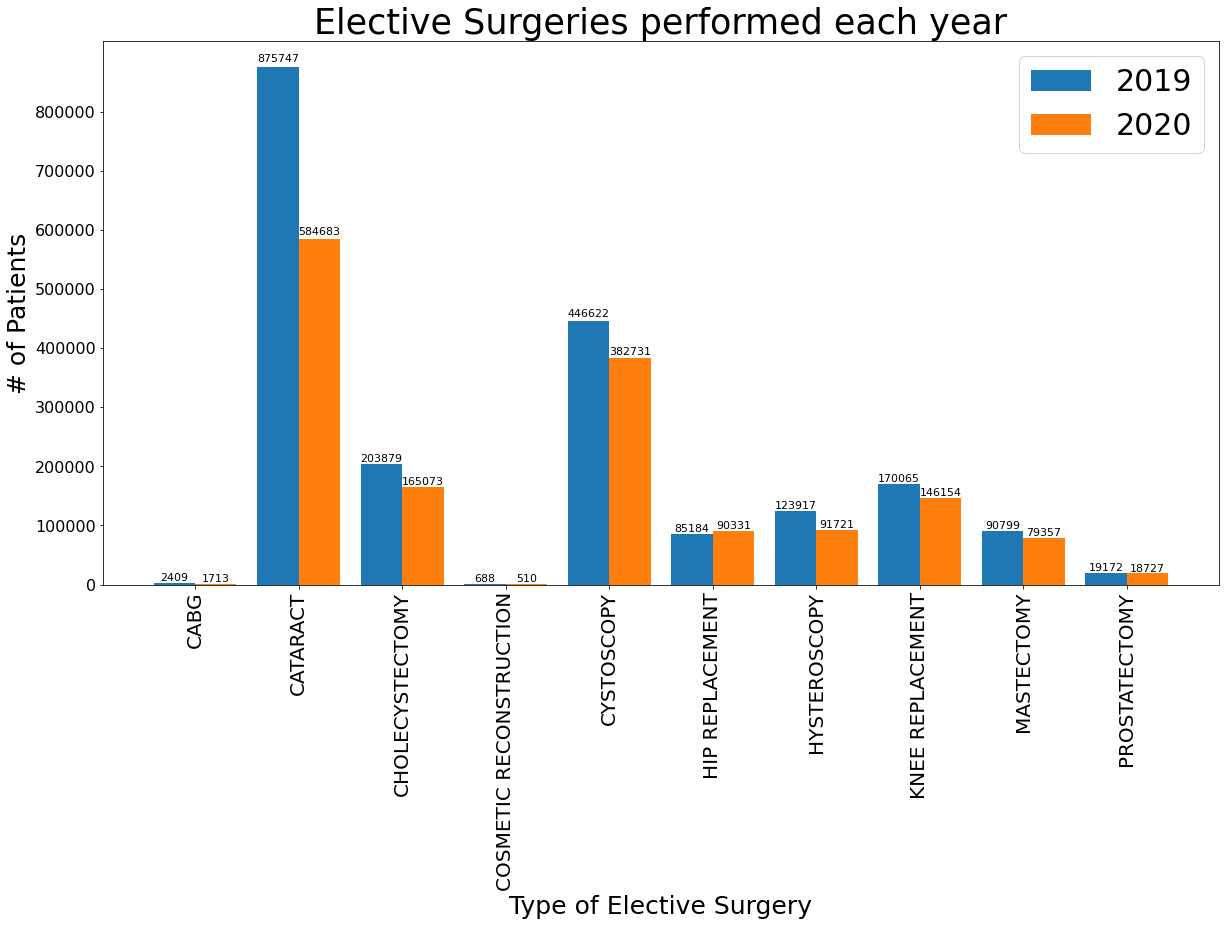

In [772]:
surgery_types = yearly_surgeries_df['ELECT_PX'][1:11].values.tolist()

surgeries_2019 = yearly_surgeries_df[yearly_surgeries_df['YEAR'] == 2019]['PATIENTS'].values.tolist()
surgeries_2020 = yearly_surgeries_df[yearly_surgeries_df['YEAR'] == 2020]['PATIENTS'].values.tolist()

x = np.arange(len(surgery_types))
width = 0.4

fig, ax = plt.subplots(figsize = (20, 10))
rects1 = ax.bar(x - width/2, surgeries_2019, width, label='2019')
rects2 = ax.bar(x + width/2, surgeries_2020, width, label='2020')

ax.set_ylabel('# of Patients', fontsize = 25)
ax.set_xlabel('Type of Elective Surgery', fontsize = 25)
ax.set_title('Elective Surgeries performed each year', fontsize = 35)
ax.set_xticks(x)
ax.set_yticks(range(0, 900000, 100000))
ax.set_xticklabels(surgery_types, rotation = "vertical", fontsize = 20)
ax.tick_params(axis = 'y', labelsize = 16)
ax.legend(fontsize = 30)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2, 1.005*height, '%d'%int(height),
                ha='center', va='bottom', fontsize = 11)
autolabel(rects1)
autolabel(rects2)

plt.show()

### Based on the above plot, we can see that the surgeries performed in 2019 and 2020 were not equally impacted by the coming of the pandemic. Cataract and CABG surgeries were most significantly impacted (a decrease in surgeries performed of about 30%), with other surgeries being affected significantly but to a lesser degree (like cystoscopies), and still other surgeries with no significant difference between 2019 and 2020 (like hip replacements and prostatectomy). 

### One hypothesis as to why there is such a difference between the impact of the pandemic on different types of surgeries is that patients were less willing to have arguably less essential elective surgeries (like cataract surgery) while they were equally willing to address more life-threatening issues by having more essential surgeries like mastectomies and prostatectomies. This hypothesis would however have to be further researched, and each surgery ranked based on a clinically-recognized level of priority. 

### Since there isn't a distinction made in this plot between pre-pandemic and mid-pandemic surgeries, due to the pandemic officially starting 3 months into 2020, we have to slightly adjust the data used to make this plot in order to better reflect the impact the pandemic made on surgeries performed. 

### To keep the comparison fair, we'll have to compare surgeries over a similar time period, as the number of surgeries in a significantly longer time period would be significantly larger. Also, to account for any potential impact that the time of the year and season have on the surgeries that patients get (for example, if more people get doctor's appointments soon after New Year's day and learn about surgeries they need because of that), we will compare over the same period of the year between pre- and mid-pandemic data. Since we only have mid-pandemic data from March to August of 2020, we'll only compare that against data from March to August of 2019.

In [553]:
relevant_fields = ['CLAIMS','PATIENTS','PHYSICIANS']
pandemic_surgeries_df = surgery_df2.groupby(['YEAR','MONTH','ELECT_PX'])[relevant_fields].sum()
pandemic_surgeries_df.head()

CLAIMS  PATIENTS  PHYSICIANS
YEAR MONTH   ELECT_PX                                             
2018 2018-12 MASTECTOMY                    1         1           1
2019 2019-01 CABG                        578       371         506
             CATARACT                 161860    123915       60117
             CHOLECYSTECTOMY           41163     30140       30652
             COSMETIC RECONSTRUCTION     124       106         106

In [554]:
months_ignored = ['2018-12', '2019-01', '2019-02', '2020-01', '2020-02']
pandemic_surgeries_df = pandemic_surgeries_df.drop(index = months_ignored, level = 1)
pandemic_surgeries_df.head(20)

CLAIMS  PATIENTS  PHYSICIANS
YEAR MONTH   ELECT_PX                                             
2019 2019-03 CABG                        490       314         424
             CATARACT                 152419    116246       55594
             CHOLECYSTECTOMY           39036     28707       29054
             COSMETIC RECONSTRUCTION     108       100          94
             CYSTOSCOPY                68583     59367       42983
             HIP REPLACEMENT           17580     10990       13110
             HYSTEROSCOPY              21067     17356       15513
             KNEE REPLACEMENT          33261     21671       23670
             MASTECTOMY                15740     12039       10953
             PROSTATECTOMY              3503      2548        2716
     2019-04 CABG                        580       368         501
             CATARACT                 170110    129741       62455
             CHOLECYSTECTOMY           38835     28610       29025
             COSMETIC RECONSTRUCTION     113        95          92
             CYSTOSCOPY                74469     64439       46892
             HIP REPLACEMENT           20144     12452       14985
             HYSTEROSCOPY              21243     17495       15811
             KNEE REPLACEMENT          38072     24722       27276
             MASTECTOMY                16986     12900       11866
             PROSTATECTOMY              3866      2851        3010

In [555]:
pandemic_surgeries_df = pandemic_surgeries_df.reset_index()
relevant_fields = ['CLAIMS','PATIENTS','PHYSICIANS']
pandemic_surgeries_df = pandemic_surgeries_df.groupby(['YEAR','ELECT_PX'])[relevant_fields].sum()
pandemic_surgeries_df.head(20)

CLAIMS  PATIENTS  PHYSICIANS
YEAR ELECT_PX                                             
2019 CABG                       2620      1674        2278
     CATARACT                 831766    636945      304098
     CHOLECYSTECTOMY          198311    146375      148262
     COSMETIC RECONSTRUCTION     569       496         480
     CYSTOSCOPY               375539    324416      234415
     HIP REPLACEMENT           97145     60547       72562
     HYSTEROSCOPY             108540     89575       80349
     KNEE REPLACEMENT         184002    119688      131745
     MASTECTOMY                83770     64608       59269
     PROSTATECTOMY             18439     13566       14503
2020 CABG                       1791      1116        1569
     CATARACT                 475015    360779      178566
     CHOLECYSTECTOMY          153528    111305      115023
     COSMETIC RECONSTRUCTION     348       305         299
     CYSTOSCOPY               294156    252787      187528
     HIP REPLACEMENT           97954     61249       71246
     HYSTEROSCOPY              71375     58338       52213
     KNEE REPLACEMENT         144420     91044      100059
     MASTECTOMY                71386     53156       49731
     PROSTATECTOMY             17953     12767       13745

In [556]:
pandemic_surgeries_df = pandemic_surgeries_df.reset_index()
pandemic_surgeries_df.head()

,YEAR,ELECT_PX,CLAIMS,PATIENTS,PHYSICIANS
0,2019,CABG,2620,1674,2278
1,2019,CATARACT,831766,636945,304098
2,2019,CHOLECYSTECTOMY,198311,146375,148262
3,2019,COSMETIC RECONSTRUCTION,569,496,480
4,2019,CYSTOSCOPY,375539,324416,234415


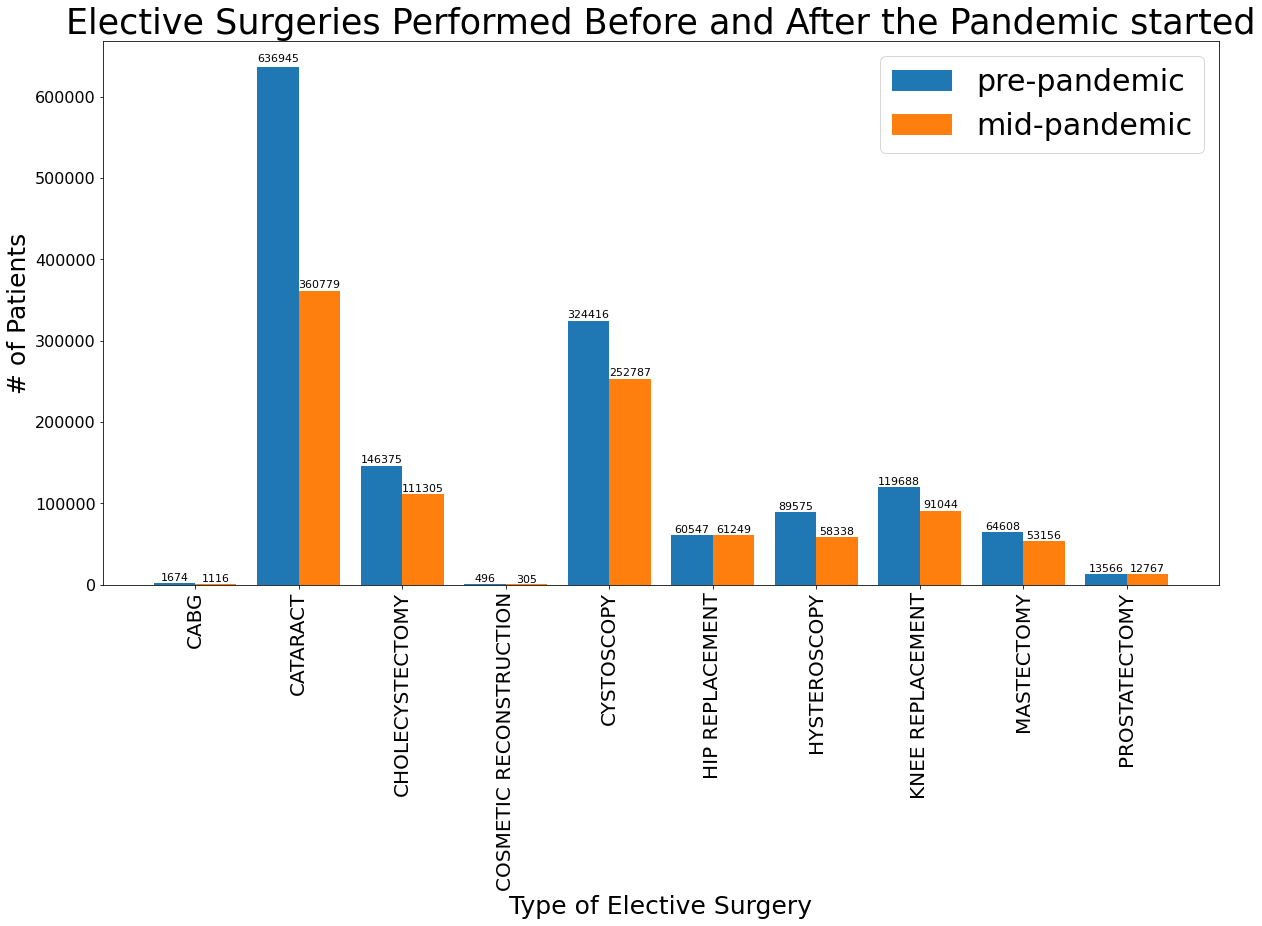

In [773]:
pre_pandemic_filter = pandemic_surgeries_df['YEAR'] == 2019
mid_pandemic_filter = pandemic_surgeries_df['YEAR'] == 2020

surgeries_pre_pandemic = pandemic_surgeries_df[pre_pandemic_filter]['PATIENTS'].values.tolist()
surgeries_mid_pandemic = pandemic_surgeries_df[mid_pandemic_filter]['PATIENTS'].values.tolist()

surgery_types = yearly_surgeries_df['ELECT_PX'][1:11].values.tolist()

x = np.arange(len(surgery_types))
width = 0.4

fig, ax = plt.subplots(figsize = (20, 10))
rects1 = ax.bar(x - width/2, surgeries_pre_pandemic, width, label='pre-pandemic')
rects2 = ax.bar(x + width/2, surgeries_mid_pandemic, width, label='mid-pandemic')

ax.set_ylabel('# of Patients', fontsize = 25)
ax.set_xlabel('Type of Elective Surgery', fontsize = 25)
ax.set_title('Elective Surgeries Performed Before and After the Pandemic started', fontsize = 35)
ax.set_xticks(x)
ax.set_yticks(range(0, 650000, 100000))
ax.set_xticklabels(surgery_types, rotation = "vertical", fontsize = 20)
ax.tick_params(axis = 'y', labelsize = 16)
ax.legend(fontsize = 30)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2, 1.005*height, '%d'%int(height),
                ha='center', va='bottom', fontsize = 11)
autolabel(rects1)
autolabel(rects2)

plt.show()

### After having adjusted the data being plotted to better compare the effect the pandemic had on elective surgeries, we can see much of the same trends as the previous plot, but a more significant impact on some surgeries. Cataract surgeries are now seen to have decreased not by 30% as in the previous plot, but by almost 50%, and the impact on surgeries already significantly impacted has increased. Hip replacements and prostatectomies are once again seen to have been barely impacted by the pandemic.

### Since we have controlled for the time of year and we are comparing between the year before and during the pandemic in terms of elective surgeries performed, it would be safe to assume that the coronavirus had a significant impact on patients' willingness or ability to get many of the elective surgeries (although to a varying degree based on surgery), as we hypothesized to be the case due to state restrictions limiting access to healthcare as well as the fear surrounding hospitals during the pandemic.

### This would be a stronger assumption if we further researched similar data on elective surgeries performed in the years leading up to 2019, to compare with the 2020 data. Another potential avenue for future research that would make these findings more conclusive could be into each of these types of elective surgeries, their trends over time, and whether any new research/discoveries in relevant medical issues have recently affected the amount of these elective surgeries being performed.

## State restrictions visualization

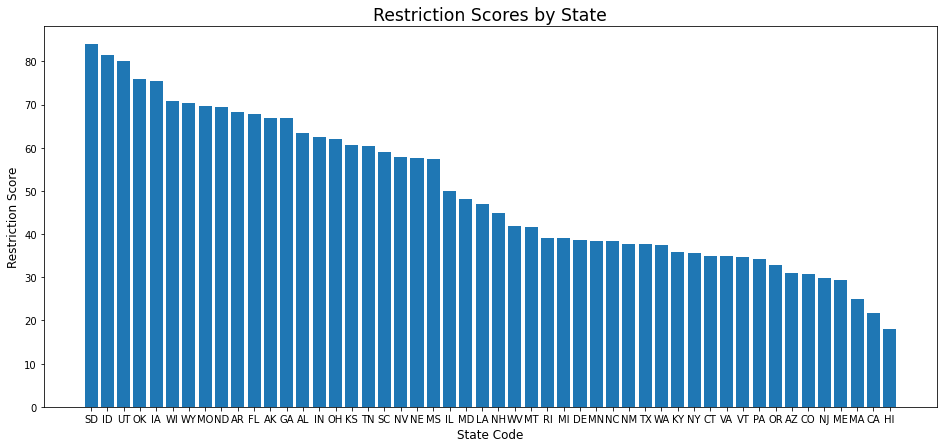

In [583]:
plt.figure(figsize = (16,7))
plt.bar(x = restrictions_df.index, height = restrictions_df['SCORE RESTR'])
plt.title("Restriction Scores by State", fontsize = 'xx-large')
plt.xlabel("State Code", fontsize = 'large')
plt.ylabel("Restriction Score", fontsize = 'large')
plt.show()

### As shown in this bar plot, there is a wide variation in COVID-19 restrictions between states like South Dakota, Idaho, and Utah and states like Hawaii, California, and Massachusetts. Another insight to be gleaned from this visual is that a significant amount of states, almost 50% of them, have a restriction score less than half that of the most heavily restricted state, South Dakota.

## Analysis of surgeries performed relative to restrictions put in place

### Now that we know that the pandemic had a significant impact on the amount of elective surgeries being performed, in general, we can further analyze this data in relation to the restrictions put in place in the corresponding states. This will allow us to gain insight into the impact that the level of restriction put in place has on the amount of patients willing to come in for an elective surgery.

In [559]:
months_ignored = ['2018-12', '2019-01', '2019-02', '2020-01', '2020-02']
relevant_fields = ['MONTH','YEAR','ELECT_PX','PTNT_ST_ABBR','PTNT_AGE_GRP']

restriction_surgeries_df = surgery_df2.groupby(relevant_fields)['PATIENTS'].sum()
restriction_surgeries_df = restriction_surgeries_df.drop(index = months_ignored, level = 0)
restriction_surgeries_df.head(10)

MONTH    YEAR  ELECT_PX  PTNT_ST_ABBR  PTNT_AGE_GRP
2019-03  2019  CABG      AL            65-79            5
                         AR            50-64            3
                                       65-79            4
                                       80 or older      3
                         AZ            50-64            6
                                       65-79            5
                                       80 or older      3
                         CA            40-49            1
                                       50-64            2
                                       65-79           16
Name: PATIENTS, dtype: int64

In [560]:
restriction_surgeries_df = restriction_surgeries_df.reset_index()
restriction_surgeries_df.head()

,MONTH,YEAR,ELECT_PX,PTNT_ST_ABBR,PTNT_AGE_GRP,PATIENTS
0,2019-03,2019,CABG,AL,65-79,5
1,2019-03,2019,CABG,AR,50-64,3
2,2019-03,2019,CABG,AR,65-79,4
3,2019-03,2019,CABG,AR,80 or older,3
4,2019-03,2019,CABG,AZ,50-64,6


In [561]:
restriction_surgeries_df = restriction_surgeries_df.groupby(['YEAR','PTNT_ST_ABBR','ELECT_PX'])['PATIENTS'].sum()
restriction_surgeries_df.head()

YEAR  PTNT_ST_ABBR  ELECT_PX               
2019  AK            CABG                         1
                    CATARACT                   316
                    CHOLECYSTECTOMY            196
                    COSMETIC RECONSTRUCTION      1
                    CYSTOSCOPY                 342
Name: PATIENTS, dtype: int64

In [562]:
print(surgeries_pre_pandemic)
print(surgeries_mid_pandemic)
print(surgery_types)

[1674, 636945, 146375, 496, 324416, 60547, 89575, 119688, 64608, 13566]
[1116, 360779, 111305, 305, 252787, 61249, 58338, 91044, 53156, 12767]
['CABG', 'CATARACT', 'CHOLECYSTECTOMY', 'COSMETIC RECONSTRUCTION', 'CYSTOSCOPY', 'HIP REPLACEMENT', 'HYSTEROSCOPY', 'KNEE REPLACEMENT', 'MASTECTOMY', 'PROSTATECTOMY']


In [708]:
temp_2019_df = restriction_surgeries_df.reset_index()
temp_2020_df = temp_2019_df[temp_2019_df['YEAR'] == 2020]
temp_2019_df = temp_2019_df[temp_2019_df['YEAR'] == 2019]
temp_2019_df.head()

,YEAR,PTNT_ST_ABBR,ELECT_PX,PATIENTS
0,2019,AK,CABG,1
1,2019,AK,CATARACT,316
2,2019,AK,CHOLECYSTECTOMY,196
3,2019,AK,COSMETIC RECONSTRUCTION,1
4,2019,AK,CYSTOSCOPY,342


In [709]:
temp_2019_df['PATIENTS'].describe()

count      495.000000
mean      2945.232323
std       6127.624173
min          1.000000
25%        104.500000
50%        828.000000
75%       2861.500000
max      55959.000000
Name: PATIENTS, dtype: float64

In [710]:
temp_2020_df['PATIENTS'].describe()

count      491.000000
mean      2042.456212
std       3808.079423
min          1.000000
25%        108.500000
50%        729.000000
75%       2148.000000
max      30791.000000
Name: PATIENTS, dtype: float64

In [711]:
temp_2019_df['PTNT_ST_ABBR'].describe()

count     495
unique     50
top        KY
freq       10
Name: PTNT_ST_ABBR, dtype: object

In [712]:
temp_2019_df['PTNT_ST_ABBR'].unique()
# print(len(temp_2019_df['PTNT_ST_ABBR'].unique()))

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [713]:
len(temp_2019_df['PTNT_ST_ABBR'].unique())

50

In [714]:
len(restrictions_df.index.unique())

50

In [715]:
print(sorted(restrictions_df.index))

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [716]:
list1 = restrictions_df.index
list2 = temp_2019_df['PTNT_ST_ABBR'].unique()
for i in list2:
    if i not in list1:
        print(i)

In [717]:
for i in temp_2019_df['PTNT_ST_ABBR'].unique():
    for j in temp_2019_df['ELECT_PX'].unique():
        temp_var = temp_2019_df[temp_2019_df['PTNT_ST_ABBR'] == i]
        if (temp_var['ELECT_PX'] == j).sum() == 0:
            print('For', i, 'there is no', j)
        

For ID there is no COSMETIC RECONSTRUCTION
For UT there is no COSMETIC RECONSTRUCTION
For VT there is no CABG
For VT there is no COSMETIC RECONSTRUCTION
For WY there is no COSMETIC RECONSTRUCTION


In [718]:
for i in temp_2020_df['PTNT_ST_ABBR'].unique():
    for j in temp_2020_df['ELECT_PX'].unique():
        temp_var = temp_2020_df[temp_2020_df['PTNT_ST_ABBR'] == i]
        if (temp_var['ELECT_PX'] == j).sum() == 0:
            print('For', i, 'there is no', j)

For AK there is no COSMETIC RECONSTRUCTION
For HI there is no COSMETIC RECONSTRUCTION
For ME there is no COSMETIC RECONSTRUCTION
For MT there is no COSMETIC RECONSTRUCTION
For NM there is no COSMETIC RECONSTRUCTION
For RI there is no COSMETIC RECONSTRUCTION
For VT there is no COSMETIC RECONSTRUCTION
For WY there is no CABG
For WY there is no COSMETIC RECONSTRUCTION


In [719]:
temp_2019_df.head()

,YEAR,PTNT_ST_ABBR,ELECT_PX,PATIENTS
0,2019,AK,CABG,1
1,2019,AK,CATARACT,316
2,2019,AK,CHOLECYSTECTOMY,196
3,2019,AK,COSMETIC RECONSTRUCTION,1
4,2019,AK,CYSTOSCOPY,342


In [720]:
missing_val = pd.DataFrame([[2019, 'ID', 'COSMETIC RECONSTRUCTION', 0],
                            [2019, 'UT', 'COSMETIC RECONSTRUCTION', 0],
                            [2019, 'VT', 'CABG', 0],
                            [2019, 'VT', 'COSMETIC RECONSTRUCTION', 0],
                            [2019, 'WY', 'COSMETIC RECONSTRUCTION', 0]], 
                           columns = ['YEAR', 'PTNT_ST_ABBR', 'ELECT_PX', 'PATIENTS'])
temp_2019_df = temp_2019_df.append(missing_val, ignore_index=True)

In [721]:
missing_val = pd.DataFrame([[2020, 'AK', 'COSMETIC RECONSTRUCTION', 0],
                            [2020, 'HI', 'COSMETIC RECONSTRUCTION', 0],
                            [2020, 'ME', 'COSMETIC RECONSTRUCTION', 0],
                            [2020, 'MT', 'COSMETIC RECONSTRUCTION', 0],
                            [2020, 'NM', 'COSMETIC RECONSTRUCTION', 0],
                            [2020, 'RI', 'COSMETIC RECONSTRUCTION', 0],
                            [2020, 'VT', 'COSMETIC RECONSTRUCTION', 0],
                            [2020, 'WY', 'CABG', 0],
                            [2020, 'WY', 'COSMETIC RECONSTRUCTION', 0],], 
                           columns = ['YEAR', 'PTNT_ST_ABBR', 'ELECT_PX', 'PATIENTS'])
temp_2020_df = temp_2020_df.append(missing_val, ignore_index=True)

In [722]:
temp_2019_df = temp_2019_df.groupby(['PTNT_ST_ABBR', 'ELECT_PX'])['PATIENTS'].sum()
temp_2020_df = temp_2020_df.groupby(['PTNT_ST_ABBR', 'ELECT_PX'])['PATIENTS'].sum()
temp_2019_df = temp_2019_df.reset_index()
temp_2020_df = temp_2020_df.reset_index()

In [723]:
temp_2019_df.sort_values(by=['PTNT_ST_ABBR', 'ELECT_PX'], ascending = True)
temp_2020_df.sort_values(by=['PTNT_ST_ABBR', 'ELECT_PX'], ascending = True)

,PTNT_ST_ABBR,ELECT_PX,PATIENTS
0,AK,CABG,1
1,AK,CATARACT,171
2,AK,CHOLECYSTECTOMY,198
3,AK,COSMETIC RECONSTRUCTION,0
4,AK,CYSTOSCOPY,252
...,...,...,...
495,WY,HIP REPLACEMENT,110
496,WY,HYSTEROSCOPY,20
497,WY,KNEE REPLACEMENT,195
498,WY,MASTECTOMY,29


In [751]:
epsilon = 1e-6
temp_2020_df['PCNT_CHANGE'] = 100*((temp_2019_df['PATIENTS']-temp_2020_df['PATIENTS'])/(temp_2019_df['PATIENTS']+epsilon))
temp_2020_df.head()

,PTNT_ST_ABBR,ELECT_PX,PATIENTS,PCNT_CHANGE
0,AK,CABG,1,0.000000
1,AK,CATARACT,171,45.886076
2,AK,CHOLECYSTECTOMY,198,-1.020408
3,AK,COSMETIC RECONSTRUCTION,0,99.999900
4,AK,CYSTOSCOPY,252,26.315789


In [752]:
temp_2020_df.describe()

,PATIENTS,PCNT_CHANGE
count,500.000000,5.000000e+02
mean,2005.692000,-9.999829e+05
std,3783.358932,1.339249e+07
min,0.000000,-2.000000e+08
25%,95.500000,6.409322e+00
50%,688.000000,2.149631e+01
75%,2120.750000,3.432298e+01
max,30791.000000,9.999998e+01


In [753]:
temp_2019_df.sort_values(by=['PTNT_ST_ABBR', 'ELECT_PX'], ascending = True)

,PTNT_ST_ABBR,ELECT_PX,PATIENTS
0,AK,CABG,1
1,AK,CATARACT,316
2,AK,CHOLECYSTECTOMY,196
3,AK,COSMETIC RECONSTRUCTION,1
4,AK,CYSTOSCOPY,342
...,...,...,...
495,WY,HIP REPLACEMENT,104
496,WY,HYSTEROSCOPY,35
497,WY,KNEE REPLACEMENT,164
498,WY,MASTECTOMY,61


In [754]:
temp_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PTNT_ST_ABBR  500 non-null    object 
 1   ELECT_PX      500 non-null    object 
 2   PATIENTS      500 non-null    int64  
 3   PCNT_CHANGE   500 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [755]:
temp_2020_df['PCNT_CHANGE'].idxmin()

433

In [756]:
temp_2020_df.iloc[433]

PTNT_ST_ABBR                         UT
ELECT_PX        COSMETIC RECONSTRUCTION
PATIENTS                              2
PCNT_CHANGE                -200000000.0
Name: 433, dtype: object

In [757]:
temp_2019_df.iloc[433]

PTNT_ST_ABBR                         UT
ELECT_PX        COSMETIC RECONSTRUCTION
PATIENTS                              0
Name: 433, dtype: object

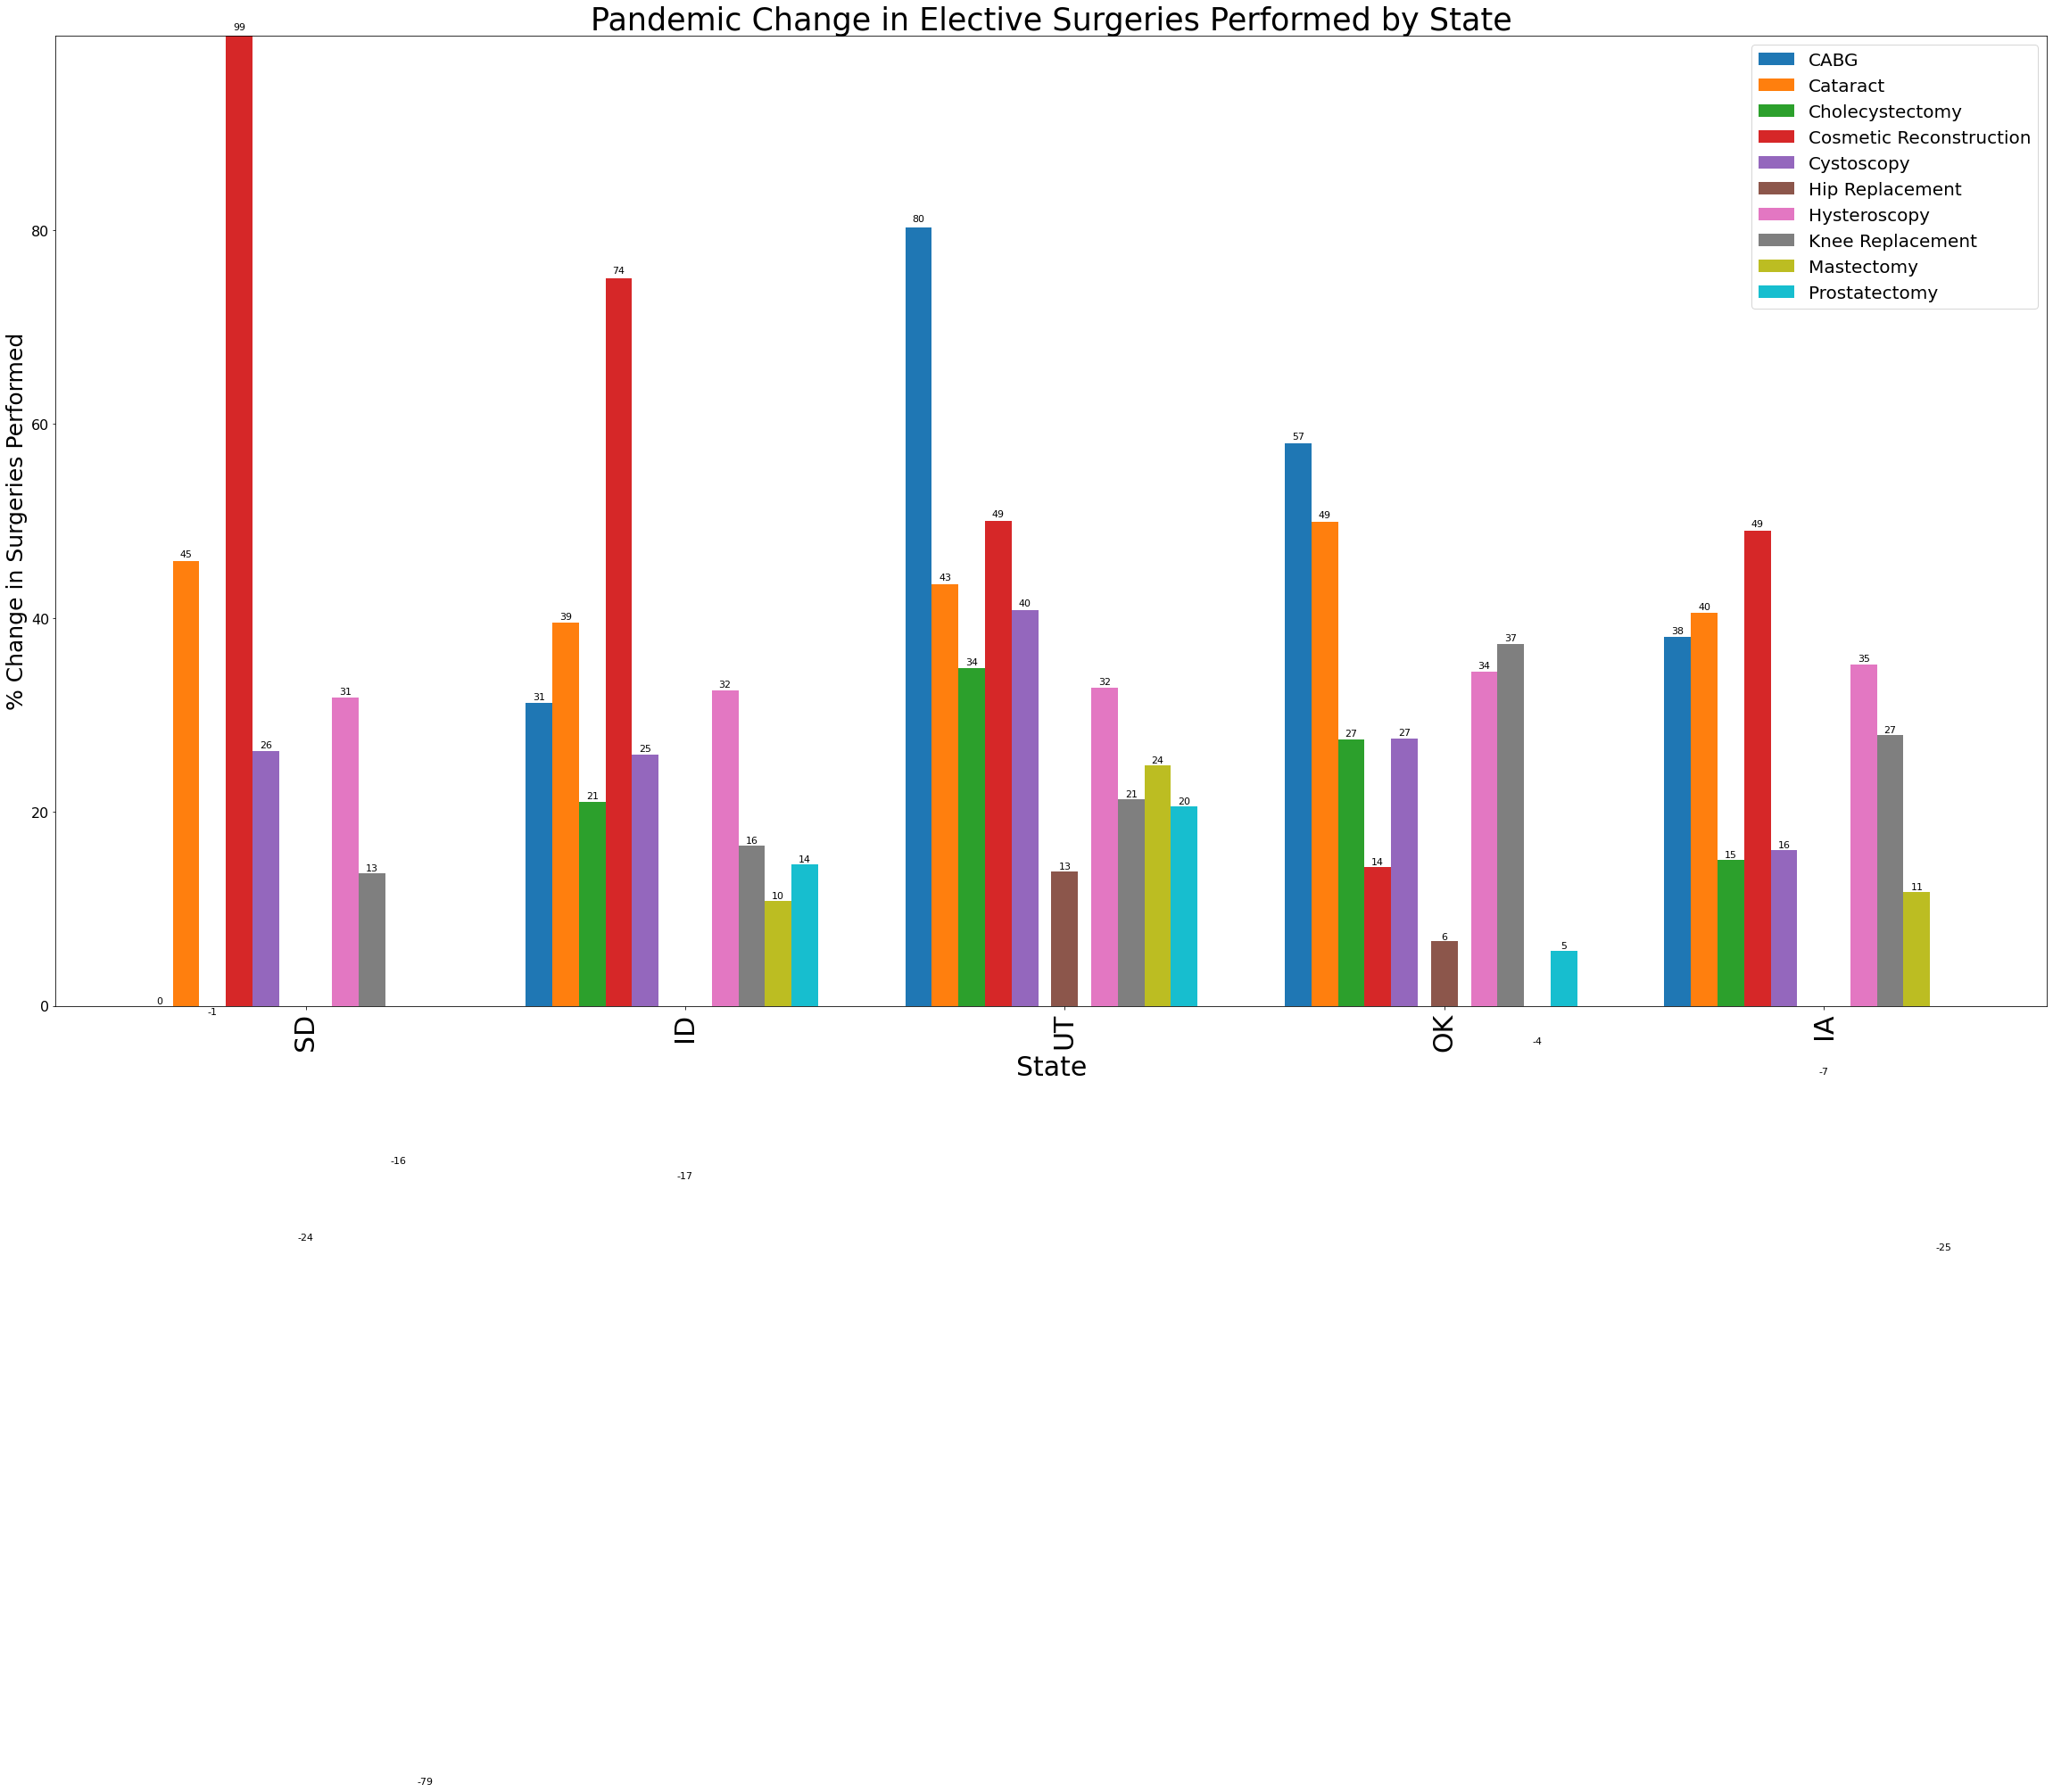

In [787]:
cabg_filter = temp_2020_df['ELECT_PX'] == 'CABG'
cataract_filter = temp_2020_df['ELECT_PX'] == 'CATARACT'
chole_filter = temp_2020_df['ELECT_PX'] == 'CHOLECYSTECTOMY'
cosm_filter = temp_2020_df['ELECT_PX'] == 'COSMETIC RECONSTRUCTION'
cyst_filter = temp_2020_df['ELECT_PX'] == 'CYSTOSCOPY'
hip_filter = temp_2020_df['ELECT_PX'] == 'HIP REPLACEMENT'
hyst_filter = temp_2020_df['ELECT_PX'] == 'HYSTEROSCOPY'
knee_filter = temp_2020_df['ELECT_PX'] == 'KNEE REPLACEMENT'
mast_filter = temp_2020_df['ELECT_PX'] == 'MASTECTOMY'
prost_filter = temp_2020_df['ELECT_PX'] == 'PROSTATECTOMY'

cabg_change = temp_2020_df[cabg_filter]['PCNT_CHANGE'].values.tolist()[0:5]
cataract_change = temp_2020_df[cataract_filter]['PCNT_CHANGE'].values.tolist()[0:5]
chole_change = temp_2020_df[chole_filter]['PCNT_CHANGE'].values.tolist()[0:5]
cosm_change = temp_2020_df[cosm_filter]['PCNT_CHANGE'].values.tolist()[0:5]
cyst_change = temp_2020_df[cyst_filter]['PCNT_CHANGE'].values.tolist()[0:5]
hip_change = temp_2020_df[hip_filter]['PCNT_CHANGE'].values.tolist()[0:5]
hyst_change = temp_2020_df[hyst_filter]['PCNT_CHANGE'].values.tolist()[0:5]
knee_change = temp_2020_df[knee_filter]['PCNT_CHANGE'].values.tolist()[0:5]
mast_change = temp_2020_df[mast_filter]['PCNT_CHANGE'].values.tolist()[0:5]
prost_change = temp_2020_df[prost_filter]['PCNT_CHANGE'].values.tolist()[0:5]

states = restrictions_df.index.values.tolist()[0:5]

x = np.arange(len(states))
width = 0.07

fig, ax = plt.subplots(figsize = (40, 20))
rects1 = ax.bar(x - width*(11/2), cabg_change, width, label='CABG')
rects2 = ax.bar(x - width*(9/2), cataract_change, width, label='Cataract')
rects3 = ax.bar(x - width*(7/2), chole_change, width, label='Cholecystectomy')
rects4 = ax.bar(x - width*(5/2), cosm_change, width, label='Cosmetic Reconstruction')
rects5 = ax.bar(x - width*(3/2), cyst_change, width, label='Cystoscopy')
rects6 = ax.bar(x, hip_change, width, label='Hip Replacement')
rects7 = ax.bar(x + width*(3/2), hyst_change, width, label='Hysteroscopy')
rects8 = ax.bar(x + width*(5/2), knee_change, width, label='Knee Replacement')
rects9 = ax.bar(x + width*(7/2), mast_change, width, label='Mastectomy')
rects10 = ax.bar(x + width*(9/2), prost_change, width, label='Prostatectomy')

ax.set_ylabel('% Change in Surgeries Performed', fontsize = 25)
ax.set_xlabel('State', fontsize = 30)
ax.set_title('Pandemic Change in Elective Surgeries Performed by State', fontsize = 35)
ax.set_xticks(x)
ax.set_yticks(range(0, 100, 20))
ax.set(ylim=(0, 100))
ax.set_xticklabels(states, rotation = "vertical", fontsize = 30)
ax.tick_params(axis = 'y', labelsize = 16)
ax.legend(fontsize = 20)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2, 1.005*height, '%d'%int(height),
                ha='center', va='bottom', fontsize = 11)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
autolabel(rects8)
autolabel(rects9)
autolabel(rects10)

plt.show()